<a href="https://colab.research.google.com/github/Faisal-Malook/Faisal/blob/main/Mehak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploratory Data Analysis – Ames House Price Dataset**

## Introduction
Ames house price data set contains information from the Ames Assessor’s
Office used in computing assessed values for individual residential properties
sold in Ames, IA from 2006 to 2010.

In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Data

In [6]:
House = pd.read_excel(r"/content/drive/My Drive/Colab Notebooks/ames.xlsx",engine='openpyxl')

#Data Description
In this section, we analyzed the statistics of every variable to have an overview of every variable distribution. You can see the distribution of everyvariable from their histogram, which shows some of them has normal distribution, while others don't. Also we had a quick overview over data types of the variables.

The ordinal features in the dataset are: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence. We will map the values of each of them to corresponding numbers as described for Bsmt Cond above and in accordance with the dataset documentation.

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

None

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


<ipython-input-7-4f2a67d2446a>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(House.describe(include=[np.object]).transpose())


,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


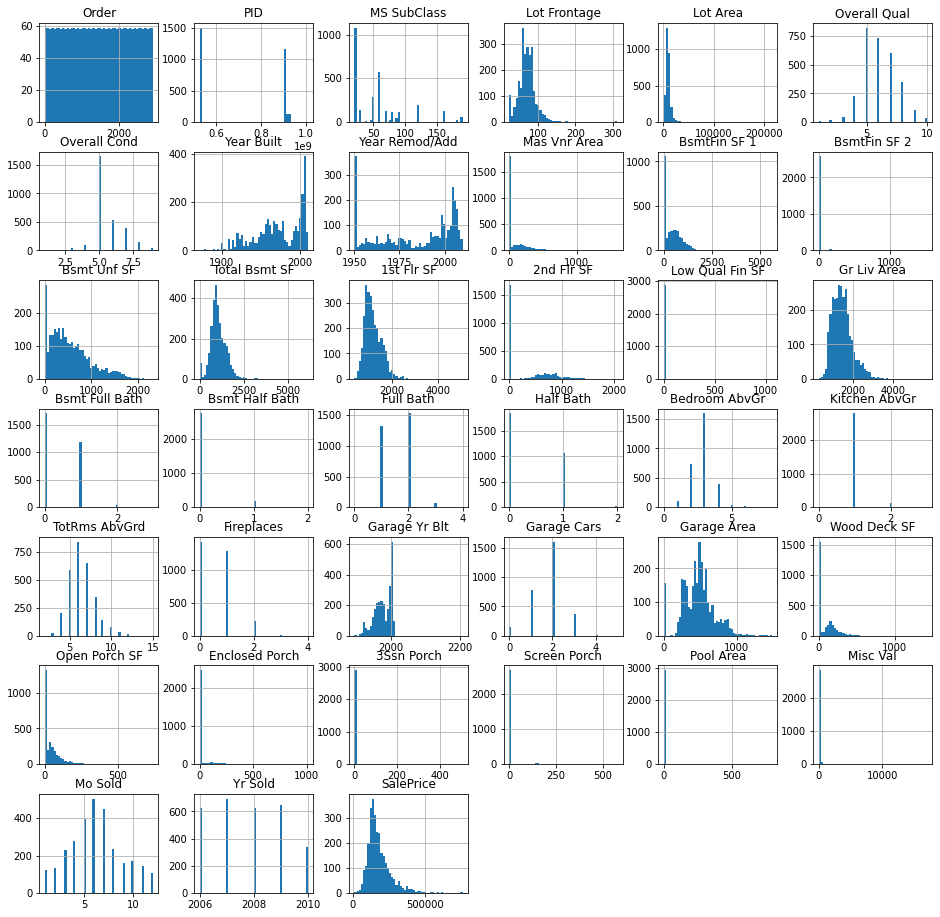

In [7]:
#Data Types
display(House.head())
display(House.info())
#Data Description
display(House.describe().transpose())
display(House.describe(include=[np.object]).transpose())
#Histograms
House.hist(bins=50, figsize=(16,16))
plt.show()

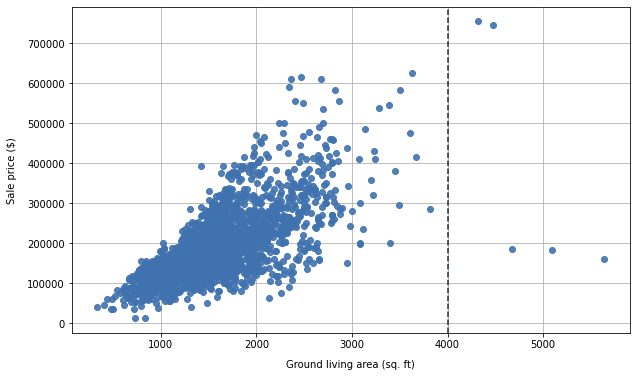

In [8]:
#Scatterplot between Ground living area and sale price
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(House["Gr Liv Area"], House["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4000, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


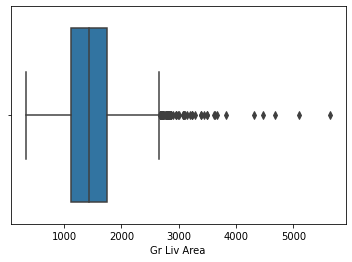

In [9]:
#Boxplot of ground living area
sns.boxplot(House["Gr Liv Area"])
plt.show()

 Box plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

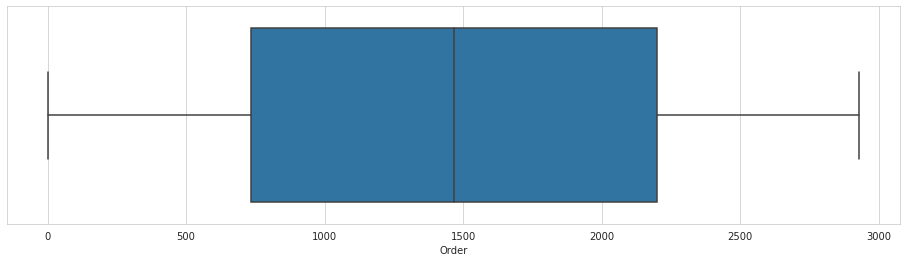

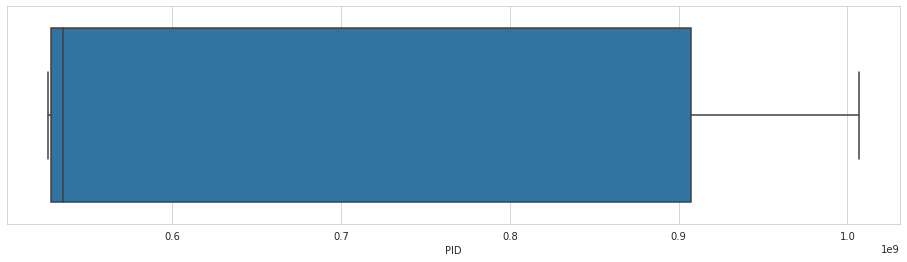

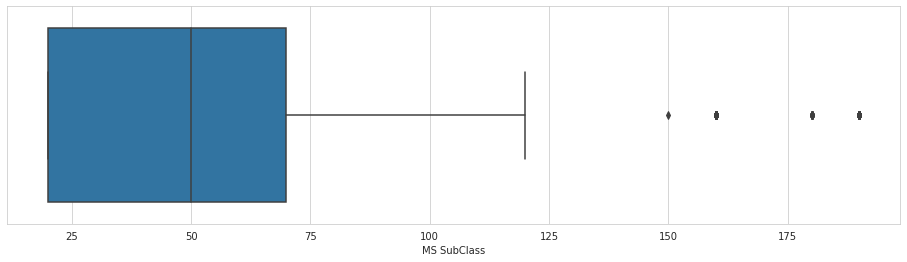

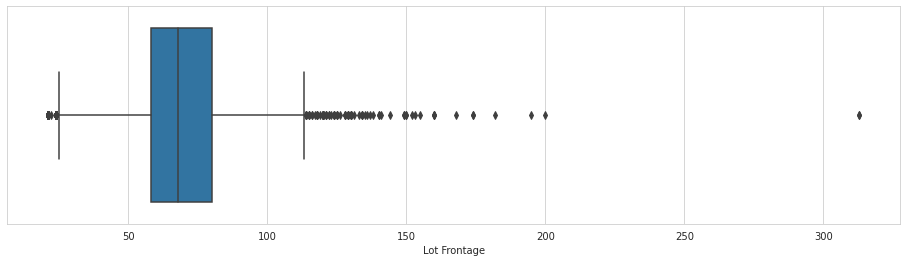

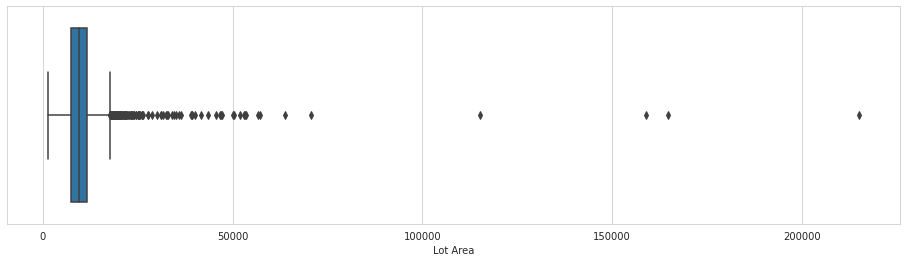

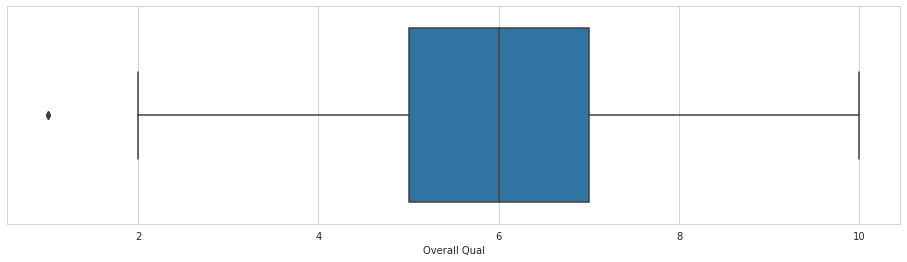

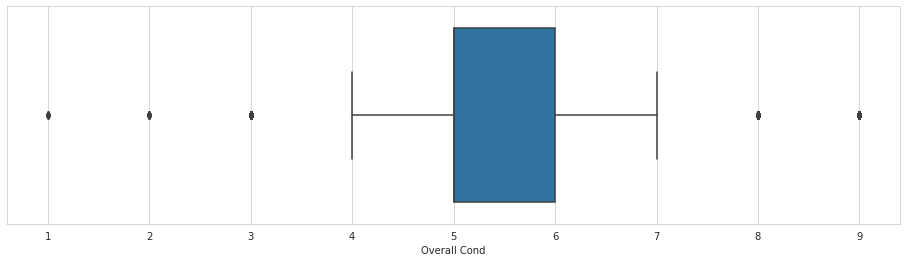

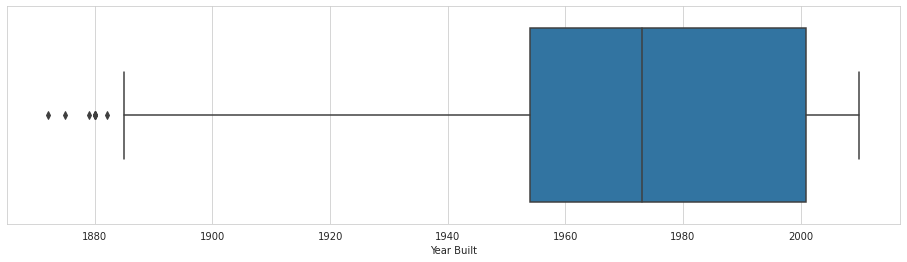

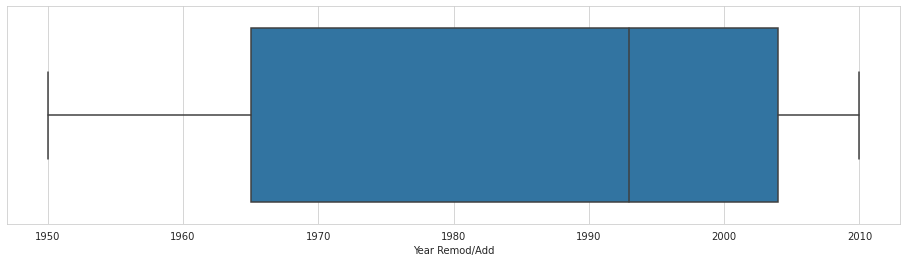

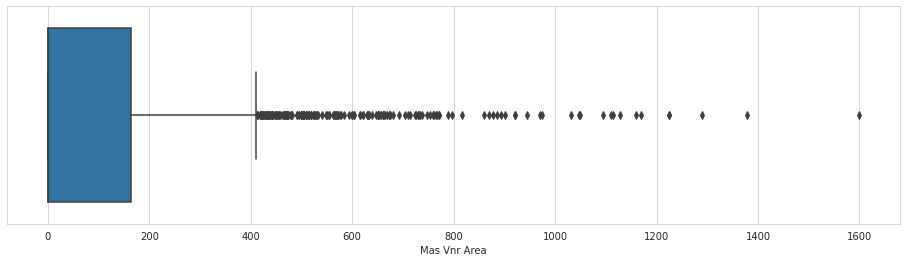

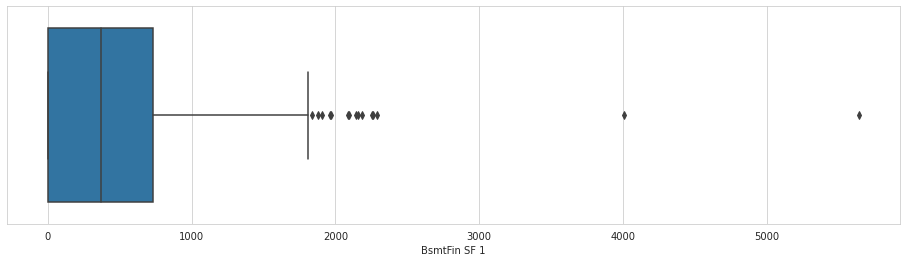

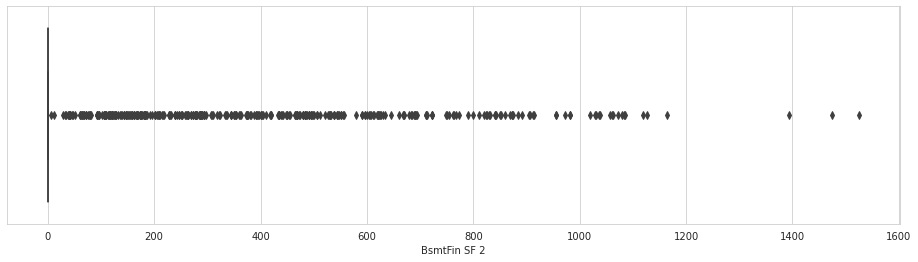

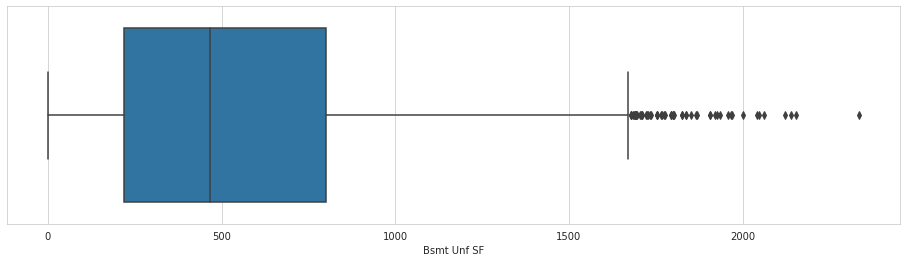

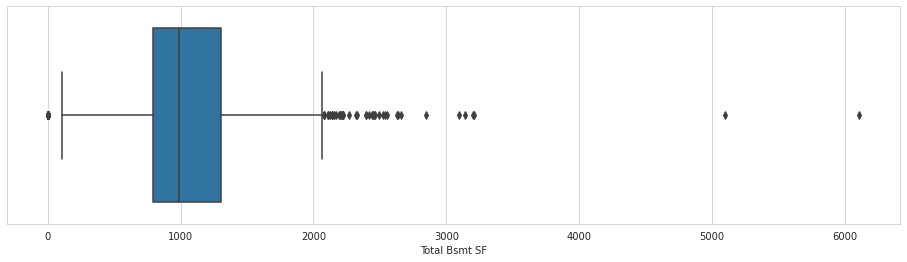

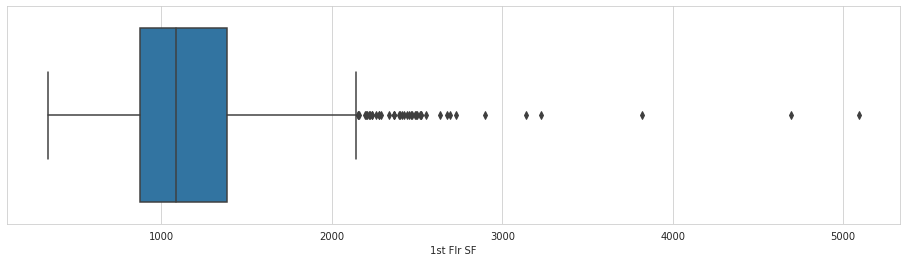

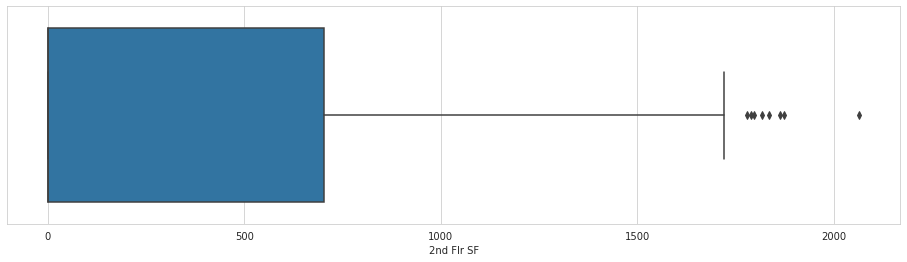

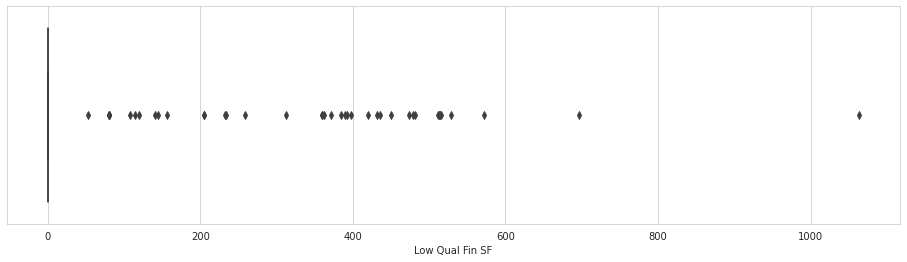

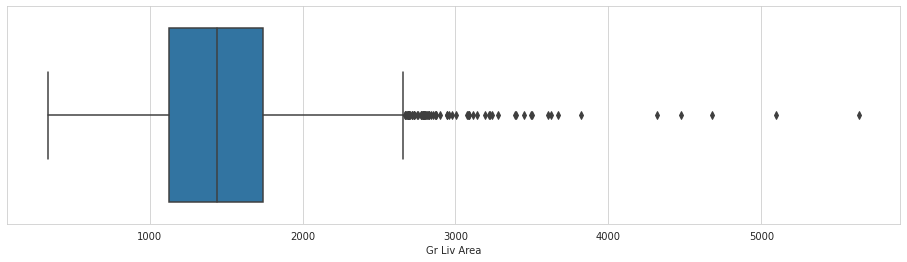

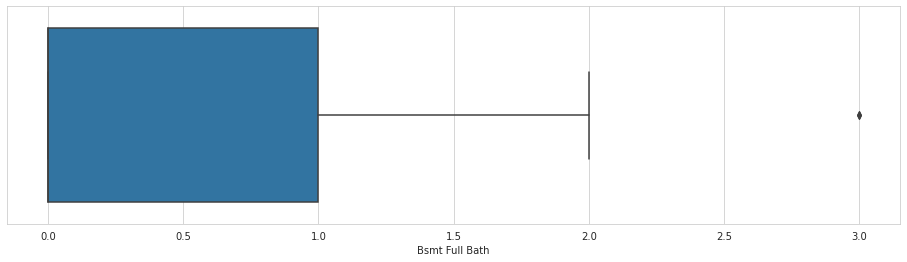

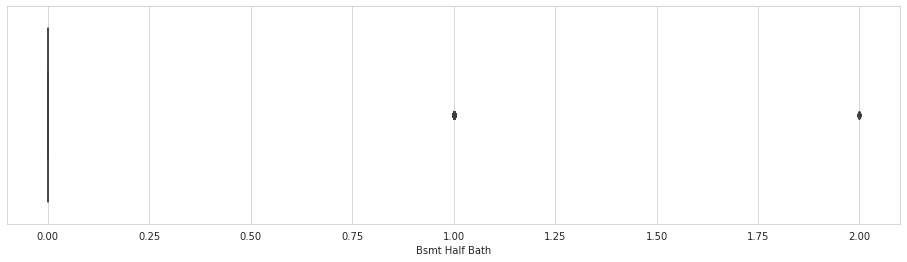

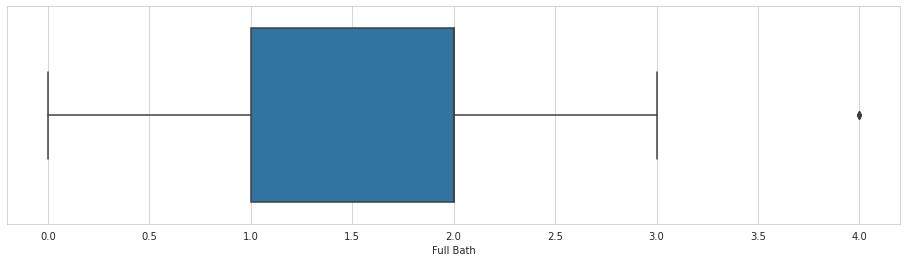

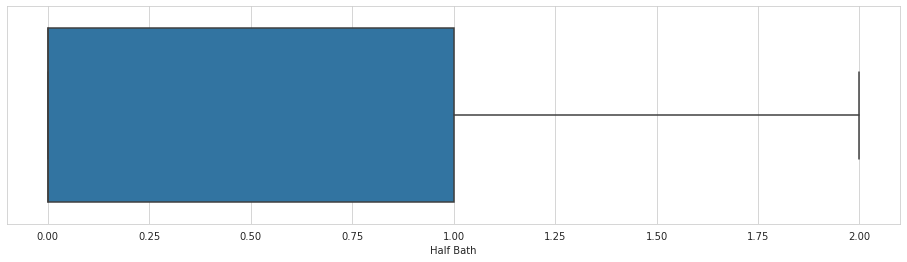

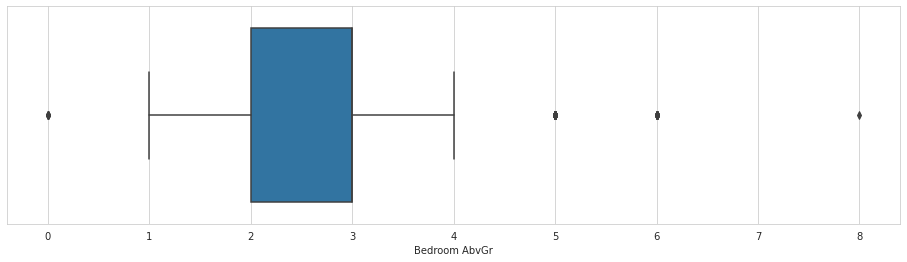

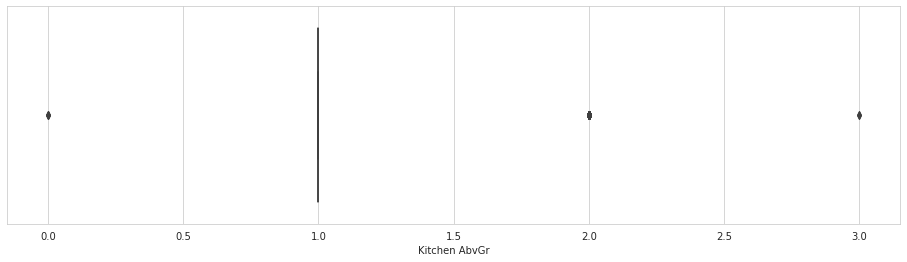

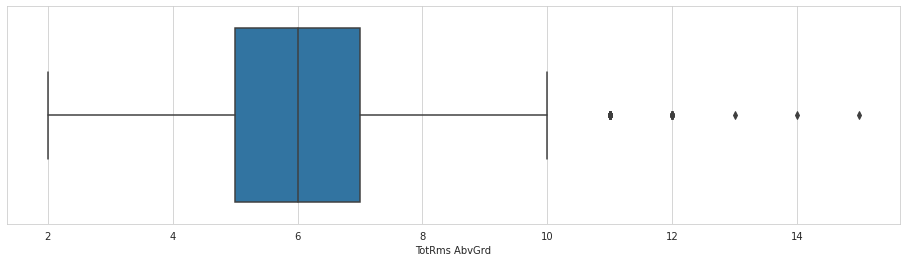

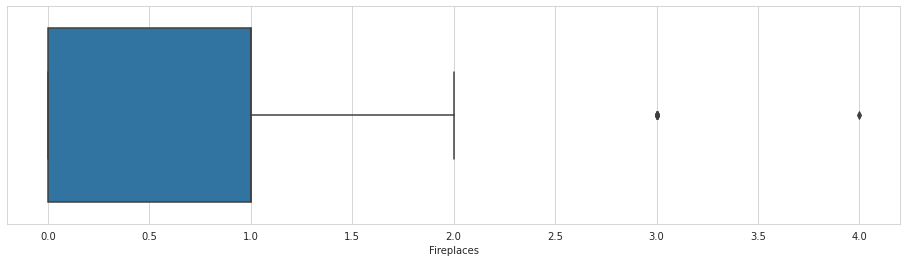

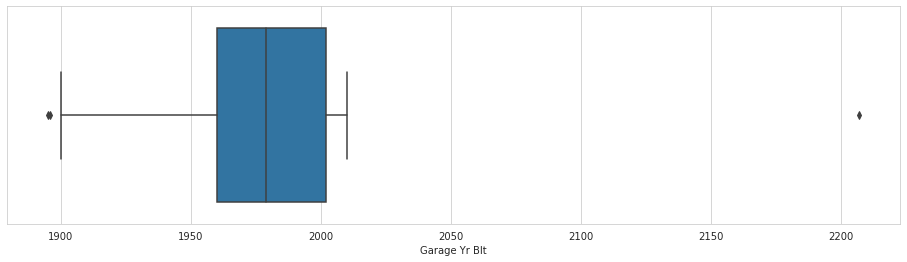

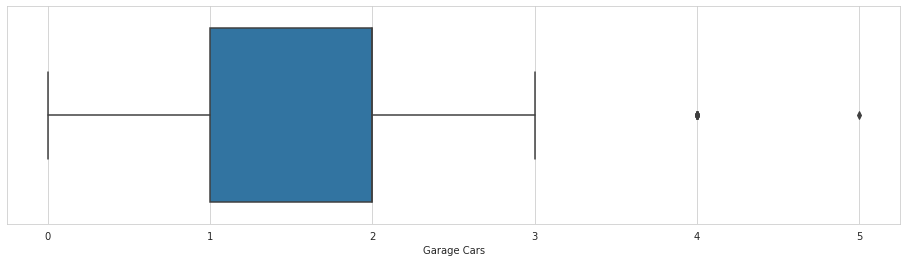

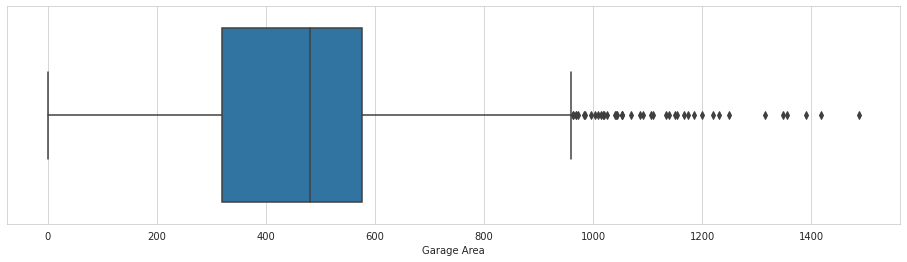

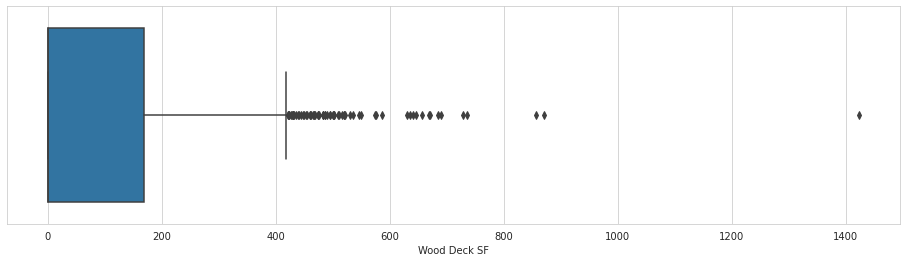

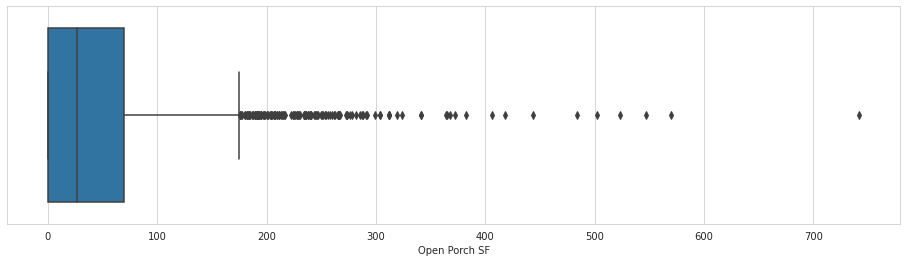

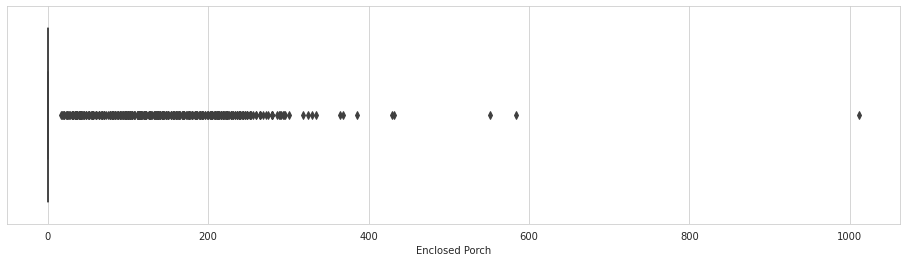

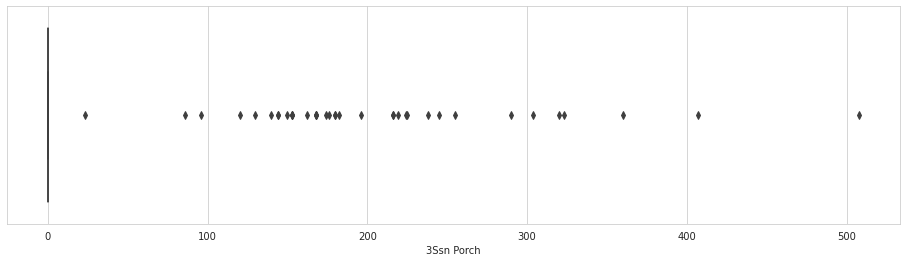

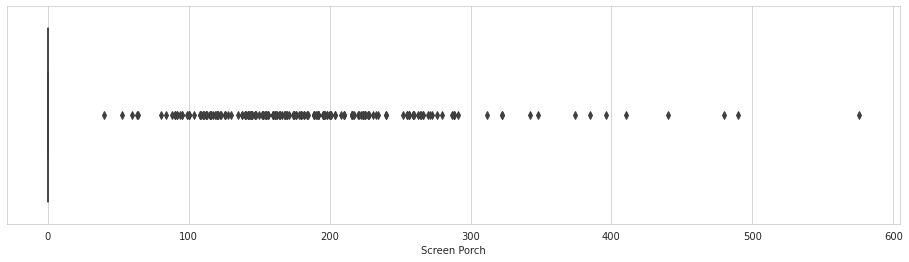

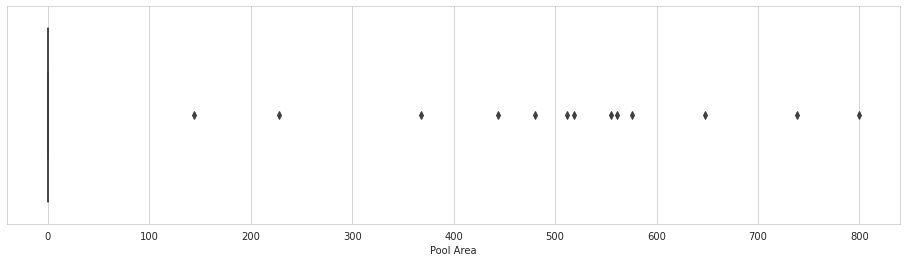

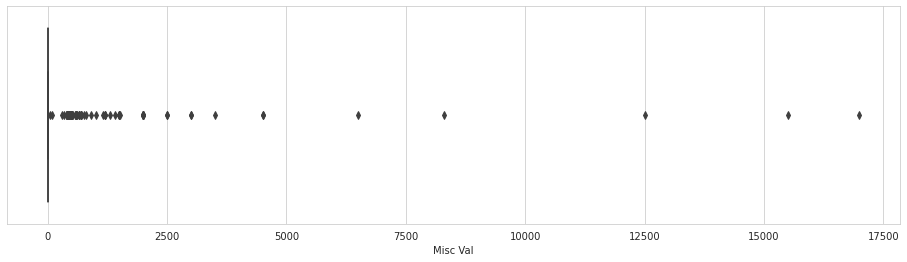

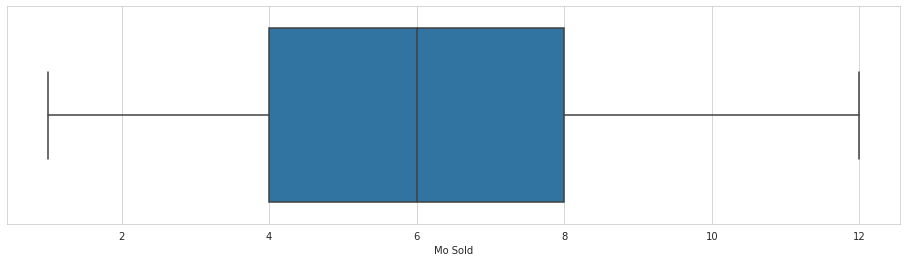

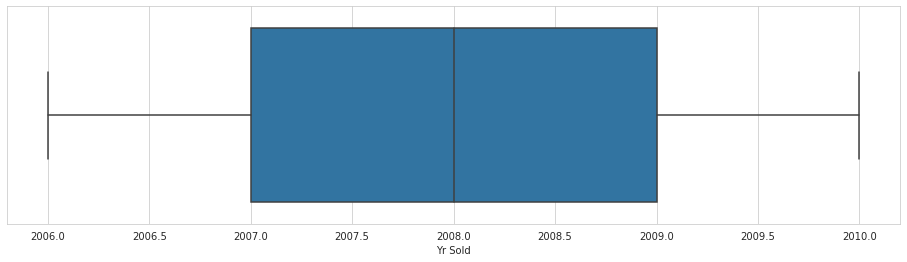

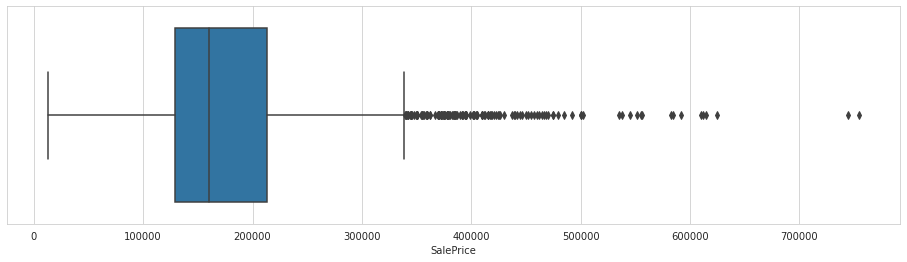

In [10]:
#Numerical outliers using boxplot
numerical_df = House.select_dtypes(exclude=['object'])
#numerical_df = numerical_df.drop(["PID"], axis=1)
#numerical_df = numerical_df.drop(["Order"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_style(style="whitegrid")
    sns.boxplot(numerical_df[column])


#Data Cleaning


In [ ]:
# Data Cleaning
House = House[House["Gr Liv Area"] < 4000]

#Missing values
display(House.isna().sum().sort_values(ascending=False))


#Deleting unimportant columns
#House.drop(House.Order, axis=1, inplace=True)
#House.drop(House["PID"], axis=1, inplace=True)
House.head()


Pool QC         2914
Misc Feature    2820
Alley           2727
Fence           2354
Fireplace Qu    1422
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#Filling Missing values
Looking at the sum of null values, it can be seen that 'Pool QC' has 2914 missing values, Misc Feature has 2820 and other different variables has so much missing value. From here it can be seen that these varibles are contributing so much less, so discrading these variables might effect the results. Instead of removing, Such a high missing value of 'Pool QC' can be interpreted as the corresponding house doesn't have a pool. Similarly all other different missing variables were filled. According to the dataset documentation, NA in Alley, Fence, and Fireplace Qu columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace" accordingly.

In [ ]:
#Filling missing values
House["Pool Area"].value_counts()
House["Pool QC"].fillna("No Pool", inplace=True)
House['Misc Feature'].fillna('No feature', inplace=True)
House['Alley'].fillna('No Alley', inplace=True)
House['Fence'].fillna('No Fence', inplace=True)
House['Fireplace Qu'].fillna('No Fireplace', inplace=True)
House['Lot Frontage'].fillna(0, inplace=True)
House['Mas Vnr Area'].fillna(0, inplace=True)
House['Mas Vnr Type'].fillna("None", inplace=True)
House['Electrical'].fillna(House['Electrical'].mode()[0], inplace=True)


#Exploratory Data Analysis


In [ ]:
display(House.describe().transpose())
display(House.describe(include=[np.object]).transpose())
display(House.get("SalePrice").describe())

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,7.320000e+02,1463.0,2.199000e+03,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,5.284770e+08,535453210.0,9.071801e+08,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2925.0,5.746085e+01,3.307561e+01,0.0,4.300000e+01,63.0,7.800000e+01,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7.438000e+03,9428.0,1.151500e+04,2.152450e+05
Overall Qual,2925.0,6.088205e+00,1.402953e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2925.0,5.563761e+00,1.112262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2925.0,1.971303e+03,3.024247e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2925.0,1.984234e+03,2.086177e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2925.0,9.991863e+01,1.755662e+02,0.0,0.000000e+00,0.0,1.620000e+02,1.600000e+03


<ipython-input-73-51d20d013ea5>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(House.describe(include=[np.object]).transpose())


,count,unique,top,freq
MS Zoning,2925,7,RL,2268
Street,2925,2,Pave,2913
Alley,2925,3,No Alley,2727
Lot Shape,2925,4,Reg,1859
Land Contour,2925,4,Lvl,2631
Utilities,2925,3,AllPub,2922
Lot Config,2925,5,Inside,2138
Land Slope,2925,3,Gtl,2784
Neighborhood,2925,28,NAmes,443
Condition 1,2925,9,Norm,2519


count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64

#Data Visualization

We can see from the voilin plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1(25%), Q2(50%) (the median), and Q3(75%).

Text(0, 0.5, 'SalePrice')

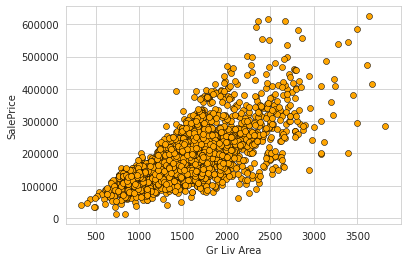

In [ ]:
#Scatter plot between Gr liv Area and Sale Price
plt.scatter(x=House['Gr Liv Area'], y=House['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice")

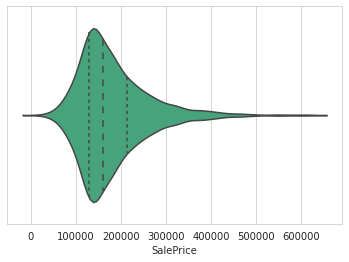

In [ ]:
#Voilin plot
sns.violinplot(x=House['SalePrice'], inner="quartile", color="#36B37E");

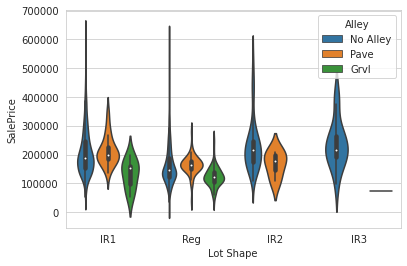

In [ ]:
House[House['Lot Shape']=='IR3'].Alley
sns.violinplot(x=House['Lot Shape'],y=House['SalePrice'],hue=House.Alley)

In the above plot , we can interpret multiple kinds of informations in one go like the histogram distribution , quartiles distribution, how the Sale Price changes with respect to Lot Shape and Alley.

#Correlation Between Variables
We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. For example, we would like to see how Lot Area and SalePrice are correlated: Do they increase and decrease together (positive correlation)? Does one of them increase when the other decrease or vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

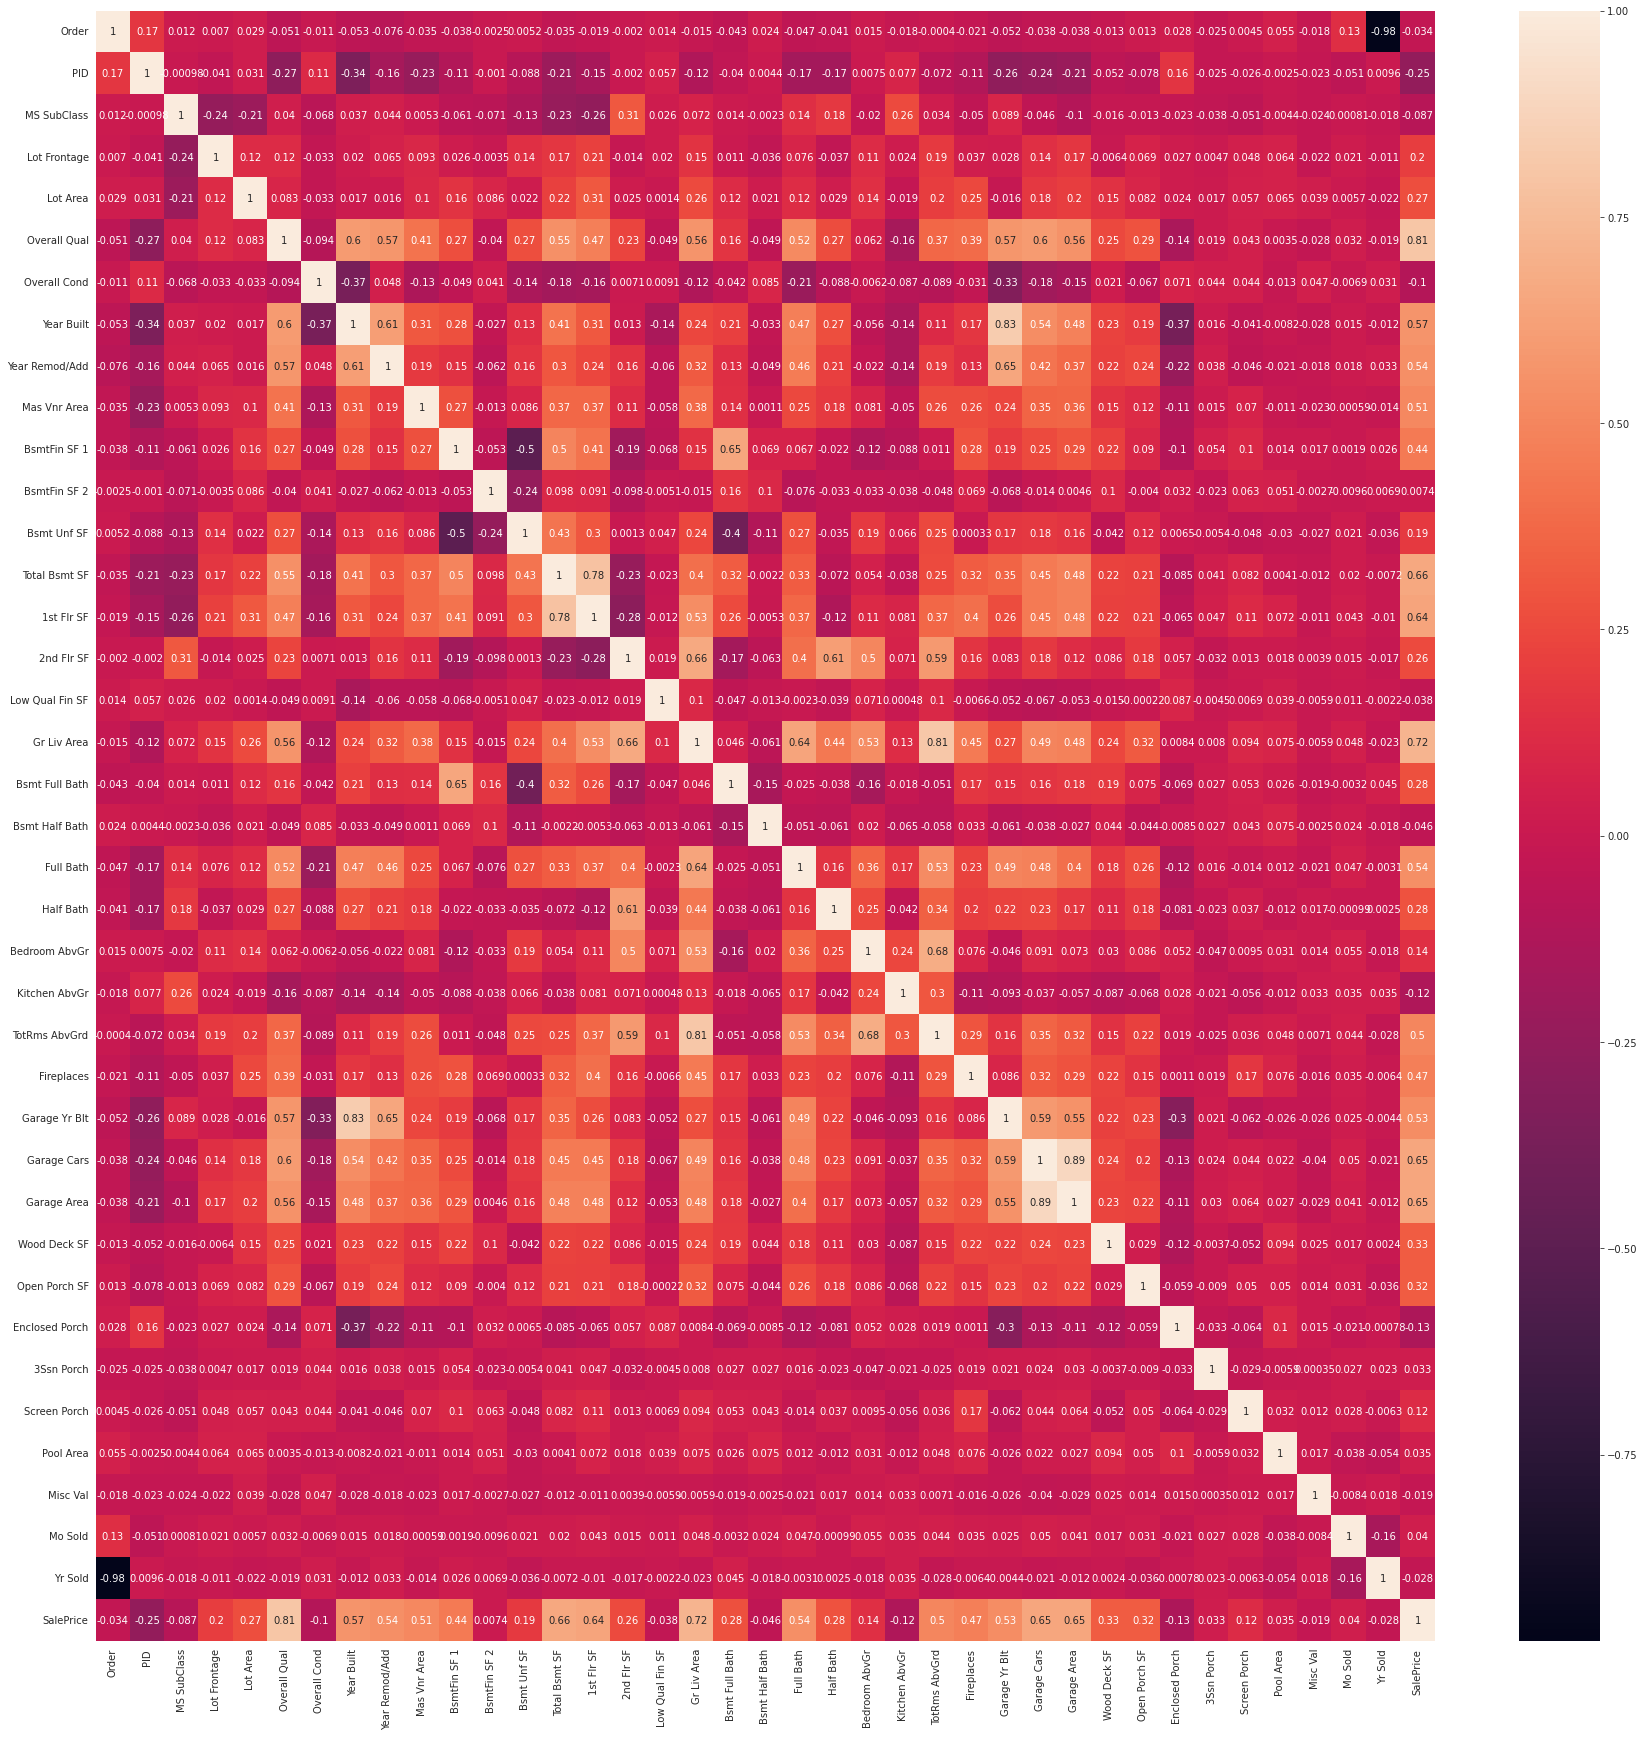

In [ ]:
#Correaltion using heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(House.corr(),ax=ax,annot=True);

We can see that there are many correlated variables in our dataset. We notice that Garage Cars and Garage Area have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that Gr Liv Area and TotRms AbvGrd are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too.

Regarding negative correlation, we can see that Bsmt Unf SF is negatively correlated with BsmtFin SF 1, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that Bsmt Unf SF is negatively correlated with Bsmt Full Bath which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (SalePrice). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with Overall Qual and Gr Liv Area. We see also that the target variable is positively correlated with Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area.

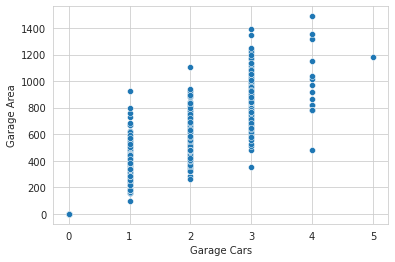

In [ ]:
sns.scatterplot(x=House['Garage Cars'],y=House['Garage Area'])

Firstly, we want to visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are Overall Qual and Gr Liv Area. We start with the relationship between the target variable and Overall Qual

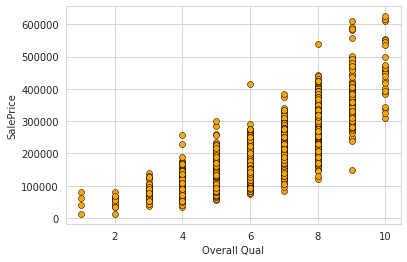

In [ ]:
plt.scatter(x=House['Overall Qual'], y=House['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

We can see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what we got from the heatmap above.

Now, we want to see the relationship between the target variable and Gr Liv Area variable which represents the living area above ground.

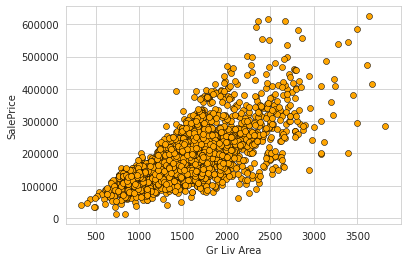

In [ ]:
plt.scatter(x=House['Gr Liv Area'], y=House['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");



The scatter plot above shows clearly the strong positive correlation between Gr Liv Area and SalePrice verifying what we found with the heatmap.

Now, we want to visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area. 

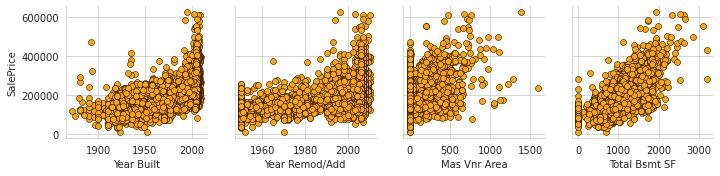

In [ ]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(House, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

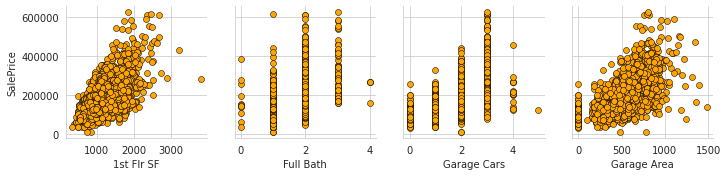

In [ ]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(House, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

From the plots above, we can see that these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as Overall Qual and Gr Liv Area.

# Data Formatting
The ordinal features in the dataset are: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence. We will map the values of each of them to corresponding numbers as described for Bsmt Cond above and in accordance with the dataset documentation

In [ ]:
#Data Formatting
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
House['Exter Qual'] = House['Exter Qual'].map(mp)
House['Exter Cond'] = House['Exter Cond'].map(mp)
House['Heating QC'] = House['Heating QC'].map(mp)
House['Kitchen Qual'] = House['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
House['Bsmt Qual'] = House['Bsmt Qual'].map(mp)
House['Bsmt Cond'] = House['Bsmt Cond'].map(mp)
House['Bsmt Exposure'] = House['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
House['BsmtFin Type 1'] = House['BsmtFin Type 1'].map(mp)
House['BsmtFin Type 2'] = House['BsmtFin Type 2'].map(mp)

House['Central Air'] = House['Central Air'].map({'Y':1,'N':0})
House['Functional'] = House['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
House['Fireplace Qu'] = House['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
House['Garage Finish'] = House['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
House['Garage Qual'] = House['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
House['Garage Cond'] = House['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
House['Pool QC'] = House['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
House['Land Slope'] = House['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
House['Fence'] = House['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})